# Hyperspy Tutorial

## Visualisation of 4D EDS/SEM mapping

Hyperspy can be easily used on data with more dimension than the classical 3D EDS mapping. EDS/SEM can be extended to three-dimensional microanalysis with a "slice-and-view" approach. With such 4D EDS/SEM mapping, a 3D stack of X-ray line intensity maps can be extracted, de-noised and plotted in 3D, as shown in this notebook with data acquired from a Ni-based supperalloy.

###### Requirement

Hyperspy 0.8.0

###### Notebook

Notebook used for the Hyperspy workshop at Cambrige university 2014, Cambridge 13 April 2015.

###### Data

The sample and the data used in this tutorial are described in 
P. Burdet, et al., Ultramicroscopy, 148, p. 158-167 (2015) (see the [abstract](http://www.sciencedirect.com/science/article/pii/S0304399114002022)).

Import HyperSpy using its IPython magic (**new in HyperSpy 0.8.1**)

In [ ]:
# %hyperspy -r qt4
import numpy as np
import hyperspy.api as hs
from hyperspy.hspy import *
%matplotlib qt4
import matplotlib.pyplot as plt



In [2]:
#Download the data (130MB)
from urllib import urlretrieve, urlopen
fnames = ['Ni_superalloy_0'+str(i)+'.rpl' for i in range(10,13)] + \
            ['Ni_superalloy_0'+str(i)+'.raw' for i in range(10,13)] + \
            ['Ni_superalloy_0'+str(i)+'.tif' for i in range(10,13)] + \
            ['Ni_superalloy_1pix.msa', 'Ni_La_intensity.hdf5']
url = 'http://cook.msm.cam.ac.uk//~hyperspy//EDS_tutorial//'
files = [urlretrieve(url + fname, fname) for fname in fnames]

Ni-based supperalloy sample is investigated with 4D EDS/SEM experiment using a FIB/SEM (Helios FEI). The data are exported from INCA software (Oxford instrument). The ".msa" file contains a single pixel spectrum and the metadata to calibrate it. The ".rpl" is a header to read the ".raw". Each ".raw" file contains an EDS/SEM spectral image, acquired at different milled thicknesses (depth or z axis). The ".tiff" files contains the corresponding SE images.

###### Sample

<img src="images/Ni_supperalloy.png" style="height:350px;">
Figure 1: 4D EDS FIB-SEM investigation of Ni-based supperalloy. Surface reconstruction of high Ni K$\alpha$ intensity in green ($\gamma$' dendrite), high Ta M$\alpha$ intensity in red (carbide precipitate) and high Hf M$\alpha$ intensity in purple (oxide precipitate).

###### Author

Pierre Burdet

###### <a id='top'></a> Table of contents

1. <a href='#calib'> Scaling and calibrating the raw data</a>
2. <a href='#visu'> Visualisation</a>
3. <a href='#fur'> Going further</a>

###### For a nice on-line display

In [6]:
#Set figure inline
%matplotlib inline

## <a id='calib'></a> 1. Scaling and calibrating the raw data

<a href='#top'> Table of contents</a>

### 1.1. Loading

In [7]:
s = hs.load("Ni_superalloy_0*.rpl", stack = True)
s.metadata.General.title = '3D EDS map'
s


Loading individual files
Loading as Image
Loading as Image
Loading as Image

Individual files loaded correctly

	Title: EDS
	Signal type: 
	Data dimensions: (1024, 3, 256, 224)
	Data representation: image
	Data type: uint8


<Image, title: 3D EDS map, dimensions: (1024, 3|256, 224)>

The data are saved as image. We want to process them as spectrum.

In [8]:
s = s.as_spectrum(0)

In [9]:
s.set_signal_type('EDS_SEM')

In [10]:
s

<EDSSEMSpectrum, title: 3D EDS map, dimensions: (256, 224, 3|1024)>

None of the axes are scaled.

/home/fjd29/Anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/fjd29/Anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


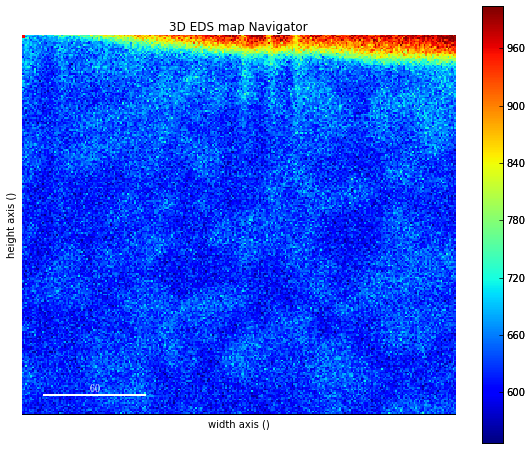

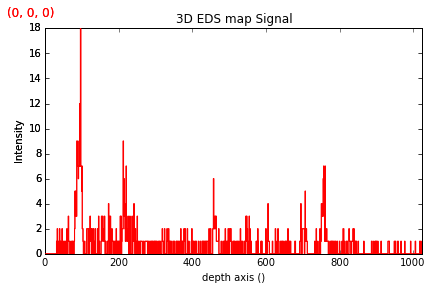

In [11]:
s.plot()

None of the microscope parameters are set (apart from the default parameters from hyperspy).

In [12]:
s.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── tilt_stage = 0.0
├── General
│   ├── original_filename = Ni_superalloy_010.rpl
│   └── title = 3D EDS map
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

### 1.2. Parameters from one-pixel spectrum

Energy axis scaling and microscope parameters can be found in the one pixel spectrum, exported as ".msa"

In [13]:
s1p = hs.load('Ni_superalloy_1pix.msa', signal_type='EDS_SEM')

/home/fjd29/Python/hyperspy/hyperspy/io_plugins/msa.py:226: UserWarning: I couldn't write the date information due toan unexpected error. Please report this error to the developers
  warnings.warn("I couldn't write the date information due to"


In [14]:
s.get_calibration_from(s1p)
s.axes_manager[-1].name = 'Energy'

In [15]:
s.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 63.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 0.006855
│       │       └── real_time = 0.0
│       ├── beam_current = 0.0
│       ├── beam_energy = 15.0
│       └── tilt_stage = 38.0
├── General
│   ├── original_filename = Ni_superalloy_010.rpl
│   └── title = 3D EDS map
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

### 1.3. Spatial axes scaling

This parameters have to be found in the acquisition software and set either with a user interface either by directly modifying the `axes_manager`.

In [16]:
names = ['x', 'y', 'z']
units = '${\mu}m$'
scales = [0.05, 0.05, 0.1]

In [17]:
s.axes_manager.gui()

In [18]:
for i in range(3):
    ax = s.axes_manager[i]
    ax.name = names[i]
    ax.units = units
    ax.scale = scales[i]  

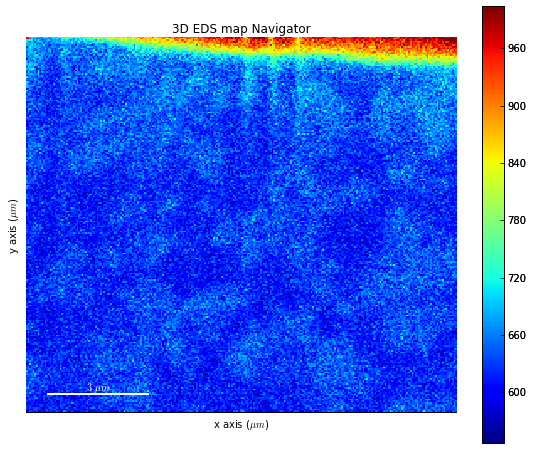

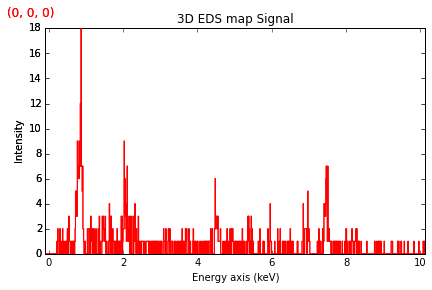

In [19]:
s.plot()

## <a id='visu'></a> 2. Visualisation

<a href='#top'> Table of contents</a>

### 2.1. X-ray lines

The position of the X-ray lines and the maps of X-ray lines intensity can be visualised.

In [20]:
elements = ['Al', 'C', 'Co', 'Cr', 'Mo', 'Ni', 'Ta', 'Ti']

In [21]:
s.set_elements(elements)

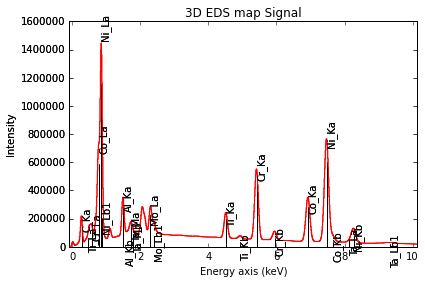

In [22]:
s.sum(0).sum(0).sum(0).plot(True)

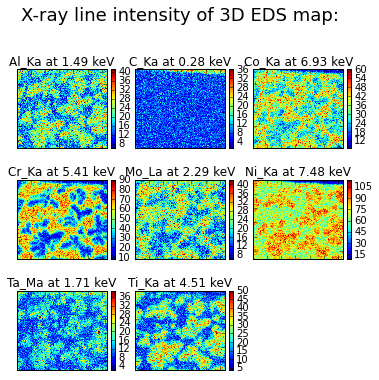

In [23]:
axes = hs.plot.plot_images(s[:, :, 0].get_lines_intensity(),
                              axes_decor=None)

### 2.2. 3D display with Mayavi

[Mayavi](http://docs.enthought.com/mayavi/mayavi/>) is a packages that allows 3D visualisation and can be used to display isosurface of Ni L${\alpha}$ intensity maps.

In [24]:
from mayavi import mlab

In [25]:
ni = s.get_lines_intensity(['Ni_La'])[0]
ni

<Image, title: X-ray line intensity of 3D EDS map: Ni_La at 0.85 keV, dimensions: (3|256, 224)>

For a nicer visualisation, the full stack de-noised with PCA and total variation filter (TV Chambolle from skimage) can be used.

In [26]:
ni = hs.load('Ni_La_intensity.hdf5')
ni

<Image, title: X-ray line intensity of 3D EDS map: Ni_La at 0.85 keV, dimensions: (62|224, 167)>

Chose the threshold and dislpay the stack with [Mayavi](http://docs.enthought.com/mayavi/mayavi/>)

In [27]:
ni.print_summary_statistics()

Summary statistics
------------------
mean:	71.033
std:	9.896

min:	25.000
Q1:	61.000
median:	69.000
Q3:	80.000
max:	95.000


In [28]:
#Create the mayavi figure
mlab.figure(bgcolor=(1, 1, 1))
#Plot the isosurface
mlab.contour3d(ni.data, contours=[85])
#Plot an outline around it
mlab.outline(color=(0, 0, 0))

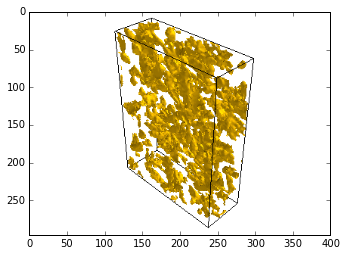

In [30]:
#Take a screenshot to display in the notebook
im = plt.imshow(mlab.screenshot()[1:])

## <a id='fur'></a> 3. Going further

<a href='#top'> Table of contents</a>

### 3.1 Scaling Mayavi isosurface 

Generating a [Mayavi](http://docs.enthought.com/mayavi/mayavi/>) scalar field allows a better control: the axes can be scaled.

In [31]:
#Create the figure
fig = mlab.figure(bgcolor=(1, 1, 1))

In [32]:
#Create the scalar field and name it
src = mlab.pipeline.scalar_field(ni.data)
src.name = 'Ni intensity'
#Transfer the scale from the hyperspy image to the mayavi scalar field
src.spacing = [ni.axes_manager[ax].scale for ax in ['z', 'x', 'y']]

In [33]:
#Plot the isosurface
mlab.pipeline.iso_surface(src, contours=[85], color=(1., 0.5, 0.2)) 
#Plot an outline around it
mlab.outline(color=(0, 0, 0))

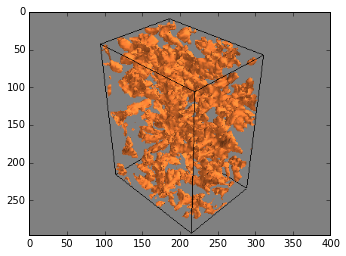

In [35]:
#Take a screenshot to display in the notebook
im = plt.imshow(mlab.screenshot()[1:])

### 3.2. Plotting with a different navigator

Another signal, such as secondary electron (SE) images can be used as a navigator for the spectrum image.

In [36]:
im = hs.load('Ni_superalloy_0*.tif', stack=True)
im.metadata.General.title = 'SE images'


Loading individual files

Individual files loaded correctly

	Title: EDS
	Signal type: 
	Data dimensions: (3, 1024, 896)
	Data representation: image
	Data type: uint16


The pixel size of the SE images is different from the EDS spectrum images. The SE images need to be rebinned.

In [37]:
im

<Image, title: SE images, dimensions: (3|1024, 896)>

In [38]:
dim = s.axes_manager.navigation_shape
dim

(256, 224, 3)

In [39]:
im = im.rebin([dim[2], dim[0], dim[1]])
im

<Image, title: SE images, dimensions: (3|256, 224)>

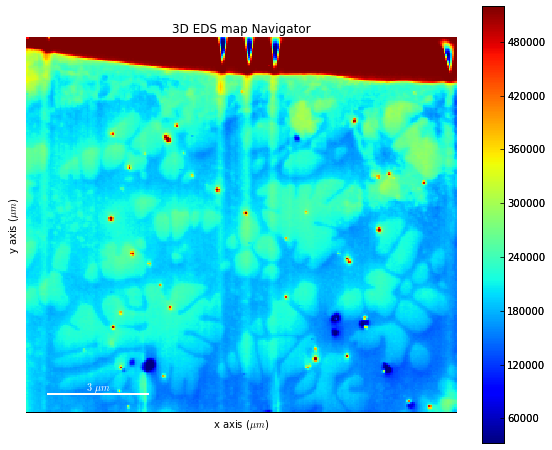

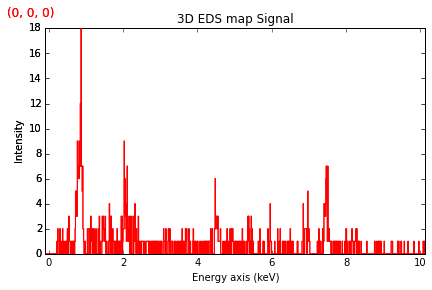

In [40]:
s.plot(navigator=im)

### 3.3. De-noising with PCA

PCA can be used to de-noise.

In [41]:
s.change_dtype('float')
s.decomposition(True)


Scaling the data to normalize the (presumably) Poissonian noise

Performing decomposition analysis
Undoing data pre-treatments


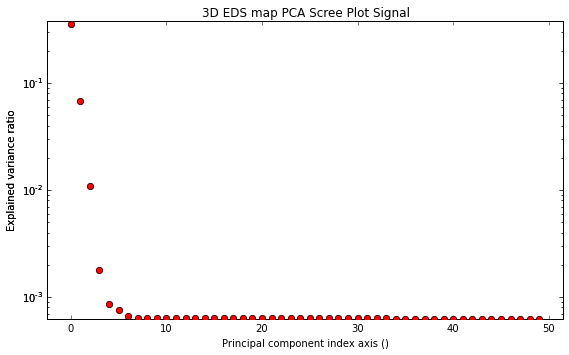

In [40]:
s.plot_explained_variance_ratio()

In [41]:
sr = s.get_decomposition_model(7)

Automatically unfolding the data


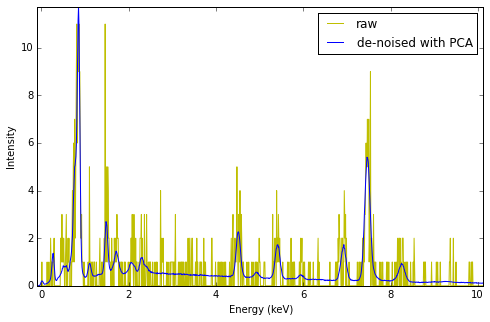

In [42]:
#Compare one spectrum
hs.plot.plot_spectra([s[10, 10, 0], sr[10, 10, 0]], color=['y', 'b'],
                        legend=['raw', 'de-noised with PCA'])

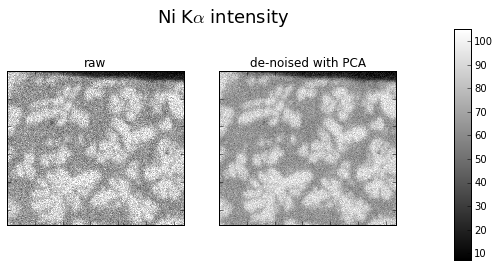

In [53]:
axes = hs.plot.plot_images(
    [i[:, :, 0].get_lines_intensity(['Ni_Ka'])[0] for i in [s, sr]], 
    suptitle='Ni K${\\alpha}$ intensity',
    label=['raw', 'de-noised with PCA'],
    axes_decor=None, colorbar='single')

### 3.4. De-noising the stack of images

[Scikit-image](http://scikit-image.org/) and [scipy](http://www.scipy.org/) python packages can be used to de-noise the Ni L${\alpha}$ intensity maps.

In [44]:
from skimage.restoration import denoise_tv_chambolle
from scipy.ndimage import median_filter

For the filters to be applied on all 3 dimension, the signal dimension is set to 3.

In [45]:
ni = s.get_lines_intensity(['Ni_La'])[0]
ni.axes_manager.set_signal_dimension(3)
ni.change_dtype('float')

A list of copy is created and the filters are applied.

In [49]:
nis = [ni.deepcopy() for i in range(3)]
nis[1].map(denoise_tv_chambolle, n_iter_max=4)
nis[2].map(median_filter, size=3)

calculating 100% |#############################################| ETA:  00:00:00 

calculating 100% |#############################################| ETA:  00:00:00 



For the dislpay, the signals are set as stack of images.

In [50]:
for i, n in enumerate(nis):
    nis[i] = n.as_image([0, 1])
    nis[i].metadata.General.title = 'Ni L${\\alpha}$ intensity' + \
        ['Raw', 'TV', 'median'][i]

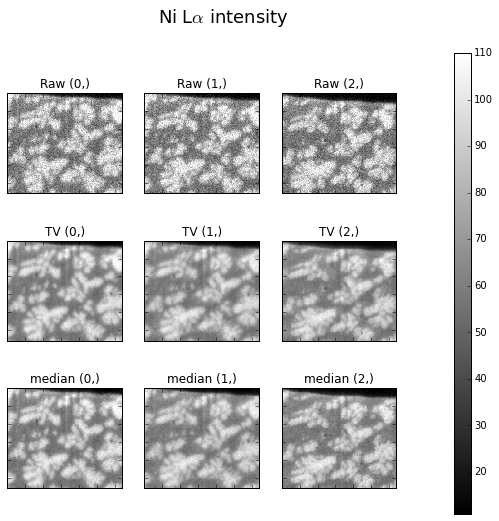

In [54]:
axes = hs.plot.plot_images(nis, axes_decor=None, colorbar='single')